# 0. 라이브러리

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm

In [3]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 1. 데이터 불러오기

In [4]:
data = pd.read_csv('./data/기업별재무거시데이터.csv', dtype={'종목코드':str})

In [5]:
data.head(1)

,기업명,종목코드,상장일,지속기간,기준연도,부채비율,자기자본비율,총자산영업이익율,ROA,ROE,매출액영업이익율,총자산증가율,매출액증가율,당기순이익증가율,영업이익증가율,유동비율,자산회전율,부채회전율,자본회전율,총매출액규모,총자산규모,GDP성장률,원달러환율,CD91일,코스닥종가,전산업생산지수,경제심리지수,뉴스심리지수,부도,폐지일
0,3S,060310,2002-04-23,7861,2022,69.873715,0.588673,0.022297,0.017986,0.031284,0.053563,16.142265,13.399616,40.639176,196.979059,1.182665,0.416268,1.012011,0.707129,24.023192,24.899618,2.61,1291.4,2.49,679.29,110.1,100.28,94.21,0,NaN


# 2. 데이터 전처리

In [6]:
data.상장일 = pd.to_datetime(data.상장일)
data.폐지일 = pd.to_datetime(data.폐지일)

In [7]:
data.shape

(1522, 30)

In [8]:
data.columns

Index(['기업명', '종목코드', '상장일', '지속기간', '기준연도', '부채비율', '자기자본비율', '총자산영업이익율',
       'ROA', 'ROE', '매출액영업이익율', '총자산증가율', '매출액증가율', '당기순이익증가율', '영업이익증가율',
       '유동비율', '자산회전율', '부채회전율', '자본회전율', '총매출액규모', '총자산규모', 'GDP성장률', '원달러환율',
       'CD91일', '코스닥종가', '전산업생산지수', '경제심리지수', '뉴스심리지수', '부도', '폐지일'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   기업명       1522 non-null   object        
 1   종목코드      1522 non-null   object        
 2   상장일       1522 non-null   datetime64[ns]
 3   지속기간      1522 non-null   int64         
 4   기준연도      1522 non-null   int64         
 5   부채비율      1522 non-null   float64       
 6   자기자본비율    1522 non-null   float64       
 7   총자산영업이익율  1522 non-null   float64       
 8   ROA       1522 non-null   float64       
 9   ROE       1522 non-null   float64       
 10  매출액영업이익율  1522 non-null   float64       
 11  총자산증가율    1522 non-null   float64       
 12  매출액증가율    1522 non-null   float64       
 13  당기순이익증가율  1522 non-null   float64       
 14  영업이익증가율   1522 non-null   float64       
 15  유동비율      1522 non-null   float64       
 16  자산회전율     1522 non-null   float64       
 17  부채회전율     1522

# 3. train test split

In [10]:
X = data.drop(['기업명', '종목코드', '상장일', '기준연도', '폐지일', '부도'], axis=1)
y = data['부도']

In [11]:
X.shape

(1522, 24)

In [12]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.6, random_state=42)

In [13]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((608, 24), (914, 24), (608,), (914,))

In [14]:
train_X.head(2)

,지속기간,부채비율,자기자본비율,총자산영업이익율,ROA,ROE,매출액영업이익율,총자산증가율,매출액증가율,당기순이익증가율,영업이익증가율,유동비율,자산회전율,부채회전율,자본회전율,총매출액규모,총자산규모,GDP성장률,원달러환율,CD91일,코스닥종가,전산업생산지수,경제심리지수,뉴스심리지수
368,4352,31.138090,0.762555,-0.003621,-0.242753,-0.292274,-0.171129,-31.114786,-11.617109,227.777520,128.485835,0.994528,0.021160,0.089116,0.027749,23.486149,27.341781,2.61,1291.4,2.49,679.29,110.1,100.28,94.21
507,3007,106.714009,0.483760,0.278248,0.194341,0.495234,0.207578,32.290019,19.536305,51.933185,50.527342,1.063965,1.340447,2.596558,2.770891,28.160150,27.867147,2.61,1291.4,2.49,679.29,110.1,100.28,94.21


# 4. Scaling

In [15]:
train_X.head(7)

,지속기간,부채비율,자기자본비율,총자산영업이익율,ROA,ROE,매출액영업이익율,총자산증가율,매출액증가율,당기순이익증가율,영업이익증가율,유동비율,자산회전율,부채회전율,자본회전율,총매출액규모,총자산규모,GDP성장률,원달러환율,CD91일,코스닥종가,전산업생산지수,경제심리지수,뉴스심리지수
368,4352,31.138090,0.762555,-0.003621,-0.242753,-0.292274,-0.171129,-31.114786,-11.617109,227.777520,128.485835,0.994528,0.021160,0.089116,0.027749,23.486149,27.341781,2.61,1291.4,2.49,679.29,110.1,100.28,94.21
507,3007,106.714009,0.483760,0.278248,0.194341,0.495234,0.207578,32.290019,19.536305,51.933185,50.527342,1.063965,1.340447,2.596558,2.770891,28.160150,27.867147,2.61,1291.4,2.49,679.29,110.1,100.28,94.21
1198,5097,212.412034,0.320090,-0.005224,-0.050699,-0.145981,-0.007634,3.707263,6.611891,19.867023,-855.082268,1.066649,0.684297,1.006453,2.137827,27.259197,27.638559,2.61,1291.4,2.49,679.29,110.1,100.28,94.21
504,3371,61.601199,0.618807,0.042760,0.050404,0.086049,0.087902,1.426872,2.379209,27.956739,40.344348,1.570008,0.486453,1.276133,0.786113,24.528756,25.249372,2.61,1291.4,2.49,679.29,110.1,100.28,94.21
1352,2790,24.117650,0.805687,-0.049228,-0.050282,-0.059850,-0.064704,-8.804150,43.734431,16.071084,-3.410316,2.959325,0.760814,3.915410,0.944305,24.325831,24.599197,2.61,1291.4,2.49,679.29,110.1,100.28,94.21
347,6241,40.634845,0.711061,0.155812,0.153805,0.242633,0.201586,17.831231,14.194350,29.542839,17.713404,2.680268,0.772931,2.675070,1.087010,26.702293,26.959859,2.61,1291.4,2.49,679.29,110.1,100.28,94.21
386,7573,57.611991,0.634469,0.017178,-0.002408,-0.003882,0.022222,3.476084,-37.769765,2372.522458,-331.573758,3.093708,0.773031,2.114820,1.218390,25.032384,25.289820,2.61,1291.4,2.49,679.29,110.1,100.28,94.21


In [16]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

cols = train_X.columns
idx_tr = train_X.index
idx_te = test_X.index

# DataFrame으로 변환 후 Scaler 적용
train_X = pd.DataFrame(scaler.fit_transform(train_X), columns=cols, index=idx_tr)
test_X = pd.DataFrame(scaler.transform(test_X), columns=cols, index=idx_te)

In [17]:
train_X.head(7)

,지속기간,부채비율,자기자본비율,총자산영업이익율,ROA,ROE,매출액영업이익율,총자산증가율,매출액증가율,당기순이익증가율,영업이익증가율,유동비율,자산회전율,부채회전율,자본회전율,총매출액규모,총자산규모,GDP성장률,원달러환율,CD91일,코스닥종가,전산업생산지수,경제심리지수,뉴스심리지수
368,-0.252847,-0.421151,0.554185,0.007315,-0.568992,-0.172562,0.079155,-0.666983,-0.220736,0.115717,0.173241,-0.538789,-1.493240,-0.981219,-0.734487,-0.974431,1.413433,0.049177,0.224169,0.218668,-0.172647,0.21793,0.128213,-0.180228
507,-0.704636,0.070926,-0.301782,1.789978,0.736524,0.570151,0.195485,0.755956,0.293835,0.052212,0.085966,-0.520288,1.261316,0.032845,0.636207,1.978410,1.837901,0.049177,0.224169,0.218668,-0.172647,0.21793,0.128213,-0.180228
1198,-0.002600,0.759130,-0.804288,-0.002823,0.004634,-0.034591,0.129377,0.114498,0.080358,0.040631,-0.927862,-0.519573,-0.108667,-0.610228,0.319877,1.409225,1.653214,0.049177,0.224169,0.218668,-0.172647,0.21793,0.128213,-0.180228
504,-0.582368,-0.222805,0.112845,0.300650,0.306612,0.184241,0.158723,0.063321,0.010445,0.043553,0.074566,-0.385454,-0.521749,-0.501164,-0.355547,-0.315754,-0.277126,0.049177,0.224169,0.218668,-0.172647,0.21793,0.128213,-0.180228
1352,-0.777527,-0.466861,0.686612,-0.281122,0.005882,0.046642,0.111846,-0.166285,0.693522,0.039260,0.025583,-0.015273,0.051094,0.566217,-0.276502,-0.443954,-0.802433,0.049177,0.224169,0.218668,-0.172647,0.21793,0.128213,-0.180228
347,0.381673,-0.359317,0.396088,1.015641,0.615450,0.331919,0.193644,0.431470,0.205600,0.044125,0.049231,-0.089627,0.076393,0.064597,-0.205195,1.057397,1.104859,0.049177,0.224169,0.218668,-0.172647,0.21793,0.128213,-0.180228
386,0.829095,-0.248778,0.160932,0.138861,0.148872,0.099425,0.138548,0.109310,-0.652708,0.890288,-0.341795,0.020533,0.076601,-0.161981,-0.139547,0.002417,-0.244446,0.049177,0.224169,0.218668,-0.172647,0.21793,0.128213,-0.180228


# 5. SMOTE

In [18]:
train_y.value_counts()

0    575
1     33
Name: 부도, dtype: int64

In [19]:
test_y.value_counts()

0    860
1     54
Name: 부도, dtype: int64

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Use fit_resample instead of fit_sample
train_X_over, train_y_over = smote.fit_resample(train_X, train_y)

print("SMOTE 적용 전 training set:", train_X.shape, train_y.shape)
print("SMOTE 적용 전 부도여부 count:\n", train_y.value_counts())
print("----------- SMOTE 적용 -----------")
print("SMOTE 적용 후 training set:", train_X_over.shape, train_y_over.shape)
print("SMOTE 적용 후 부도여부 count:\n", train_y_over.value_counts())

SMOTE 적용 전 training set: (608, 24) (608,)
SMOTE 적용 전 부도여부 count:
 0    575
1     33
Name: 부도, dtype: int64
----------- SMOTE 적용 -----------
SMOTE 적용 후 training set: (1150, 24) (1150,)
SMOTE 적용 후 부도여부 count:
 0    575
1    575
Name: 부도, dtype: int64


In [21]:
train_X = train_X_over.copy()
train_y = train_y_over.copy()

## 6. 기업 부도 예측

In [22]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

### DecisionTree

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_X, train_y)

print(f"Accuracy for DecisionTree : {accuracy_score(test_y, dt.predict(test_X))}")
print(f"F1_score for DecisionTree : {f1_score(test_y, dt.predict(test_X))}")

Accuracy for DecisionTree : 0.9857768052516411
F1_score for DecisionTree : 0.8869565217391304


#### DecisionTree Tuning

In [24]:
from sklearn.model_selection import GridSearchCV

# Create the random forest regressor
dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a grid search object using the defined parameter grid
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='f1_macro', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search_dt.fit(train_X, train_y)

# Get the best parameters from the grid search
best_params = grid_search_dt.best_params_
print("Best hyperparameters for DecisionTree: ", grid_search_dt.best_params_)

Best hyperparameters for DecisionTree:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [25]:
dt = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)
dt.fit(train_X, train_y)

print(f"Accuracy for DecisionTree : {accuracy_score(test_y, dt.predict(test_X))}")
print(f"F1_score for DecisionTree : {f1_score(test_y, dt.predict(test_X))}")

Accuracy for DecisionTree : 0.9857768052516411
F1_score for DecisionTree : 0.8869565217391304


### RandomForest

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(train_X, train_y)

print(f"Accuracy for RandomForest : {accuracy_score(test_y, rf.predict(test_X))}")
print(f"F1_score for RandomForest : {f1_score(test_y, rf.predict(test_X))}")

Accuracy for RandomForest : 0.9956236323851203
F1_score for RandomForest : 0.9622641509433962


#### RandomForest Tuning

In [27]:
from sklearn.model_selection import GridSearchCV

# Create the random forest regressor
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a grid search object using the defined parameter grid
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='f1_macro', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search_rf.fit(train_X, train_y)

# Get the best parameters from the grid search
best_params = grid_search_rf.best_params_
print("Best hyperparameters for RandomForest: ", grid_search_rf.best_params_)

Best hyperparameters for RandomForest:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [28]:
rf = RandomForestClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42)
rf.fit(train_X, train_y)

print(f"Accuracy for RandomForest : {accuracy_score(test_y, rf.predict(test_X))}")
print(f"F1_score for RandomForest : {f1_score(test_y, rf.predict(test_X))}")

Accuracy for RandomForest : 0.9956236323851203
F1_score for RandomForest : 0.9622641509433962


### LightGBM

In [29]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)
lgbm.fit(train_X, train_y)

print(f"Accuracy for LightGBM : {accuracy_score(test_y, lgbm.predict(test_X))}")
print(f"F1_score for LightGBM : {f1_score(test_y, lgbm.predict(test_X))}")

Accuracy for LightGBM : 0.9945295404814004
F1_score for LightGBM : 0.9523809523809523


#### LightGBM Tuning

In [30]:
from sklearn.model_selection import GridSearchCV

# Define the model
lgbm = LGBMClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'num_leaves': [5, 10],
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [100, 500, 1000]
}

# Perform grid search
grid_search_lgbm = GridSearchCV(lgbm, param_grid, scoring='f1_macro', cv=5, n_jobs=-1)
grid_search_lgbm.fit(train_X, train_y)

# Print the best hyperparameters
print("Best hyperparameters for LightGBM: ", grid_search_lgbm.best_params_)

Best hyperparameters for LightGBM:  {'learning_rate': 0.01, 'n_estimators': 1000, 'num_leaves': 5}


In [31]:
lgbm = LGBMClassifier(learning_rate=0.01, n_estimators=1000, num_leaves=5, random_state=42)
lgbm.fit(train_X, train_y)

print(f"Accuracy for LightGBM : {accuracy_score(test_y, lgbm.predict(test_X))}")
print(f"F1_score for LightGBM : {f1_score(test_y, lgbm.predict(test_X))}")

Accuracy for LightGBM : 0.9956236323851203
F1_score for LightGBM : 0.9622641509433962


### XGBoost

In [32]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(train_X, train_y)

print(f"Accuracy for XGBoost : {accuracy_score(test_y, xgb.predict(test_X))}")
print(f"F1_score for XGBoost : {f1_score(test_y, xgb.predict(test_X))}")

Accuracy for XGBoost : 0.9945295404814004
F1_score for XGBoost : 0.9532710280373832


#### XGBoost Tuning

In [33]:
from sklearn.model_selection import GridSearchCV

# Define the model
xgb = XGBClassifier(random_state=42)

# Define the hyperparameters to be tuned
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Define the GridSearchCV
grid_search_xgb = GridSearchCV(xgb, param_grid, scoring='f1_macro', cv=5, n_jobs=-1)

# Fit the GridSearchCV with the data
grid_search_xgb.fit(train_X, train_y)

# Get the best hyperparameters and print the best score
best_params = grid_search_xgb.best_params_
print("Best hyperparameters for XGBoost: ", best_params)

Best hyperparameters for XGBoost:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [34]:
xgb = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, random_state=42)
xgb.fit(train_X, train_y)

print(f"Accuracy for XGBoost : {accuracy_score(test_y, xgb.predict(test_X))}")
print(f"F1_score for XGBoost : {f1_score(test_y, xgb.predict(test_X))}")

Accuracy for XGBoost : 0.9956236323851203
F1_score for XGBoost : 0.9622641509433962


### MLP

In [35]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=300, random_state=42)
mlp.fit(train_X, train_y)

print(f"Accuracy for MLP : {accuracy_score(test_y, mlp.predict(test_X))}")
print(f"F1_score for MLP : {f1_score(test_y, mlp.predict(test_X))}")

Accuracy for MLP : 0.9912472647702407
F1_score for MLP : 0.9215686274509804


#### MLP Tuning

In [36]:
from sklearn.model_selection import GridSearchCV

# Define the MLPRegressor model
mlp = MLPClassifier(max_iter=300, random_state=42)

# Define the hyperparameters to be tuned
param_grid = {'hidden_layer_sizes': [(10,), (50,)], 
              'activation': ['logistic', 'tanh', 'relu'],
              'solver': ['lbfgs', 'sgd', 'adam'],
              'alpha': [0.001, 0.01, 0.1]}

# Create the GridSearchCV object
grid_search_mlp = GridSearchCV(mlp, param_grid, scoring='f1_macro', cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_mlp.fit(train_X, train_y)

# Get the best parameters and the best MLPRegressor model
best_params = grid_search_mlp.best_params_

print("Best hyperparameters for MLP: ", best_params)

/Users/yeorii/opt/anaconda3/envs/yeonii/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yeorii/opt/anaconda3/envs/yeonii/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yeorii/opt/anaconda3/envs/yeonii/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yeorii/opt/anaconda3/envs/yeonii/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

Best hyperparameters for MLP:  {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (50,), 'solver': 'lbfgs'}


In [37]:
mlp = MLPClassifier(activation='relu', alpha=0.1, hidden_layer_sizes=(50,), solver='lbfgs', max_iter=300, random_state=42)
mlp.fit(train_X, train_y)

print(f"Accuracy for MLP : {accuracy_score(test_y, mlp.predict(test_X))}")
print(f"F1_score for MLP : {f1_score(test_y, mlp.predict(test_X))}")

Accuracy for MLP : 0.9901531728665208
F1_score for MLP : 0.9108910891089108


### SVM

In [38]:
from sklearn.svm import SVC

svm = SVC(random_state=42)
svm.fit(train_X, train_y)

print(f"Accuracy for SVM: {accuracy_score(test_y, svm.predict(test_X))}")
print(f"F1 Score for SVM: {f1_score(test_y, svm.predict(test_X))}")

Accuracy for SVM: 0.986870897155361
F1 Score for SVM: 0.8750000000000001


### Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(train_X, train_y)

print(f"Accuracy for Naive Bayes: {accuracy_score(test_y, nb.predict(test_X))}")
print(f"F1 Score for Naive Bayes: {f1_score(test_y, nb.predict(test_X))}")


Accuracy for Naive Bayes: 0.9923413566739606
F1 Score for Naive Bayes: 0.9369369369369369


# 6. 변수 중요도 시각화

In [40]:
import skimage
import shap

In [41]:
# cb = CatBoostRegressor(depth=3, learning_rate=0.01, random_state=42)
# cb.fit(train_X, train_y)

# print(f"MSE for CatBoost : {mean_squared_error(test_y, cb.predict(test_X))}")
# print(f"MSLE for CatBoost : {mean_squared_log_error(test_y_res, cb.predict(test_X))}")

xgb = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, random_state=42)
xgb.fit(train_X, train_y)

print(f"Accuracy for XGBoost : {accuracy_score(test_y, xgb.predict(test_X))}")
print(f"F1_score for XGBoost : {f1_score(test_y, xgb.predict(test_X))}")

Accuracy for XGBoost : 0.9956236323851203
F1_score for XGBoost : 0.9622641509433962


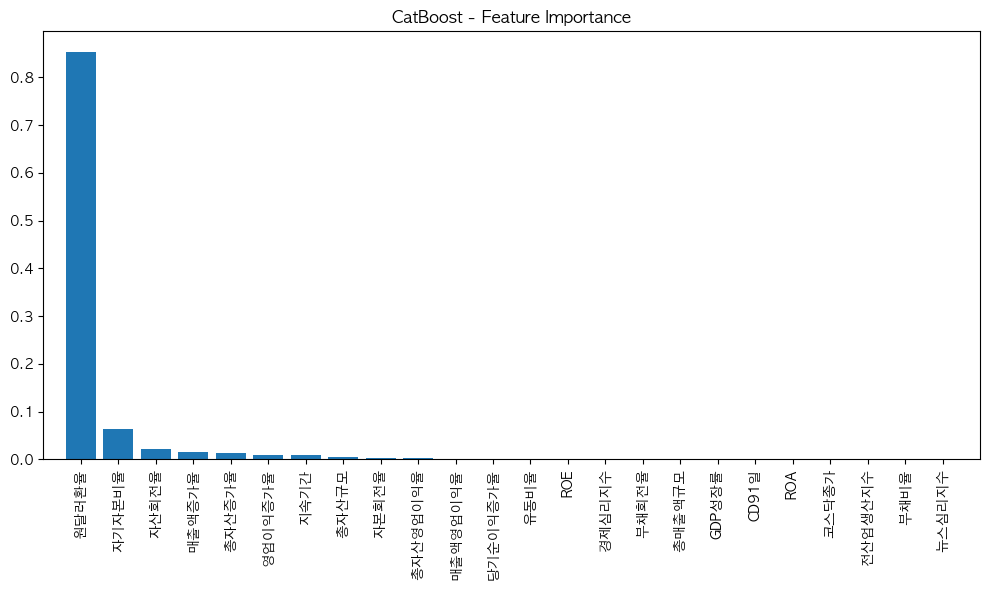

In [42]:
importances = xgb.feature_importances_

# 변수 중요도를 내림차순으로 정렬
indices = importances.argsort()[::-1]

# 변수 이름 추출 (여기서 train_X은 학습 데이터의 독립 변수입니다.)
feature_names = train_X.columns

# 변수 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title("CatBoost - Feature Importance")
plt.bar(range(train_X.shape[1]), importances[indices], align="center")
plt.xticks(range(train_X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, train_X.shape[1]])
plt.tight_layout()
plt.show()

In [43]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(test_X)

In [44]:
shap.initjs() # javascript 초기화 (graph 초기화)
shap.force_plot(explainer.expected_value, shap_values[0,:], test_X.iloc[0,:])

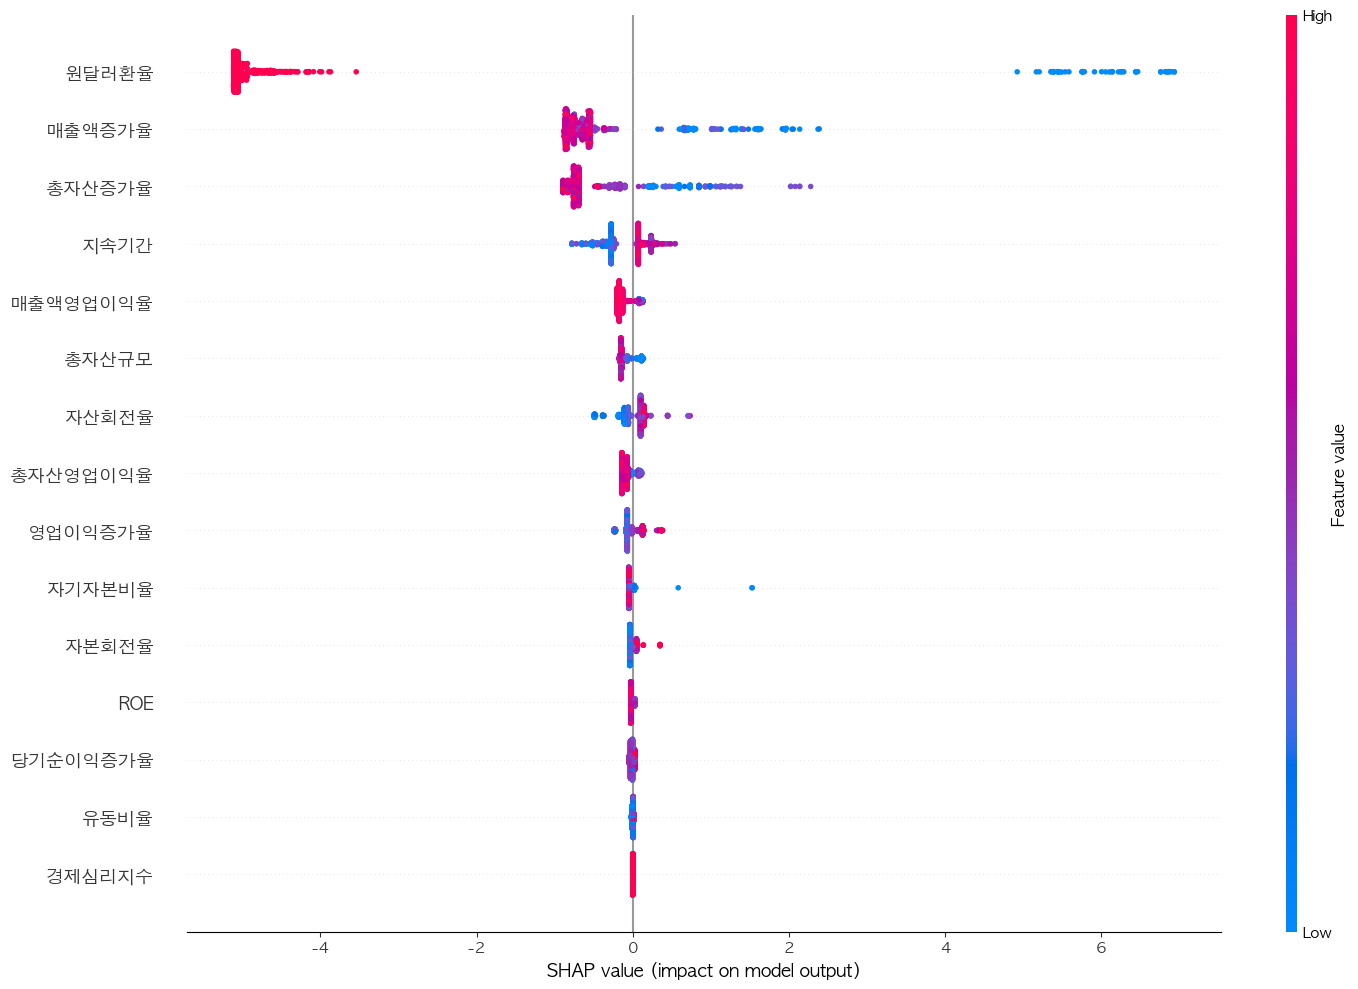

In [45]:
# summary
shap.summary_plot(shap_values, test_X, max_display=15, plot_size=(15,10))

In [46]:
test_X.columns.shape

(24,)

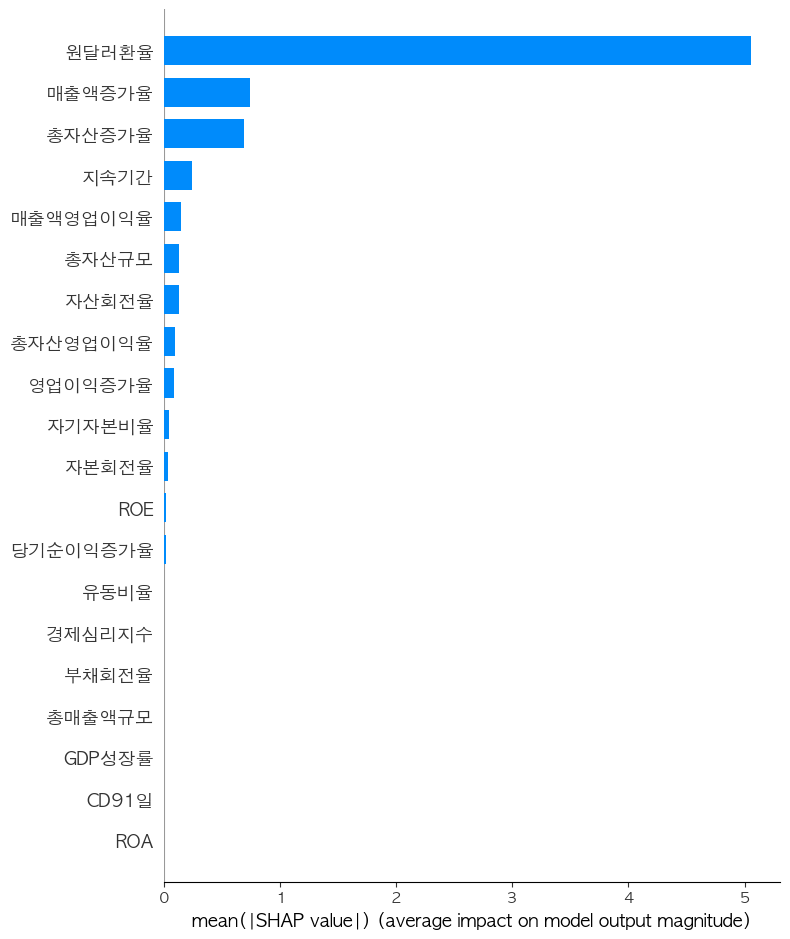

In [47]:
 # 각 변수에 대한 |Shap Values|을 통해 변수 importance 파악
shap.summary_plot(shap_values, test_X, plot_type = "bar")

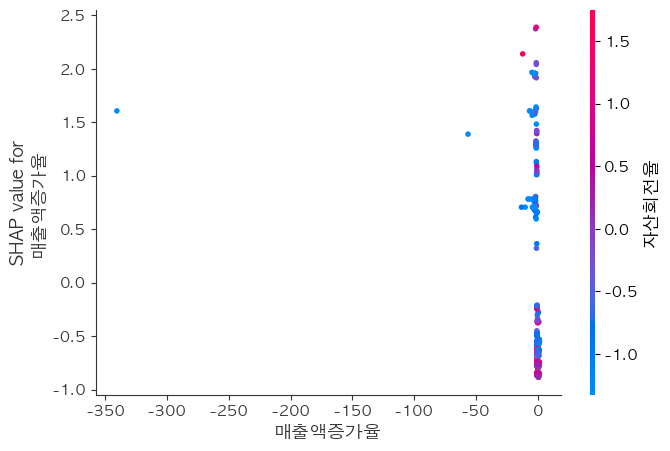

In [49]:
# 변수 간의 shap value 파악
shap.dependence_plot("매출액증가율", shap_values, test_X)

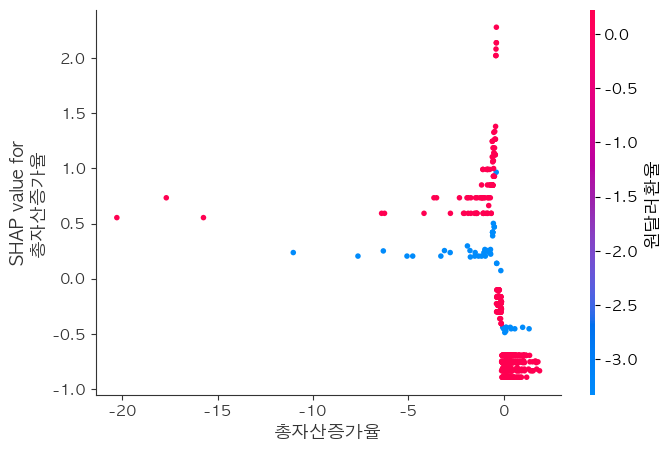

In [50]:
# 변수 간의 shap value 파악
shap.dependence_plot("총자산증가율", shap_values, test_X)

In [51]:
feature_names = train_X.columns

cb_resultX = pd.DataFrame(shap_values, columns = feature_names)

vals = np.abs(cb_resultX.values).mean(0)

shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
shap_importance

,col_name,feature_importance_vals
18,원달러환율,5.051881
8,매출액증가율,0.745381
7,총자산증가율,0.688292
0,지속기간,0.241525
6,매출액영업이익율,0.148726
16,총자산규모,0.131519
12,자산회전율,0.129976
3,총자산영업이익율,0.094719
10,영업이익증가율,0.090628
2,자기자본비율,0.047350


### 0.001 cutoff

In [52]:
x_list = shap_importance[shap_importance.feature_importance_vals>=0.001]['col_name'].tolist()

In [53]:
train_cut_X = train_X[x_list]
test_cut_X = test_X[x_list]

In [54]:
train_cut_X.shape

(1150, 14)

In [56]:
# Define the CatBoost Regressor model
xgb_cut = XGBClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {'depth': [3, 5, 7, 10, 20],
              'learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5]}

# Define the grid search using the model and hyperparameters
grid_search_xgb_cut = GridSearchCV(xgb_cut, param_grid, scoring='f1_macro', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search_xgb_cut.fit(train_cut_X, train_y)

# Print the best parameters and the best score
print("Best parameters:", grid_search_xgb_cut.best_params_)

[02:47:00] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "depth" } are not used.

[02:47:00] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "depth" } are not used.

[02:47:00] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "depth" } are not used.

[02:47:00] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "depth" } are not used.

[02:47:00] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "depth" } are not used.

[02:47:00] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpyth